# Least Square Method

### We'll start off by importing what we need

**NOTE:** You can `import cs111` module. See the website for the latest version.

In [2]:
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk

In [2]:
# Can we use npla.solve() on LSQ problems?

A = np.array([[1,0,0], [0,1,0], [0,0,1], [-1,1,0], [-1,0,1], [0,-1,1]])
b = np.array([1237, 1941, 2417, 711, 1177, 475])

x = npla.solve(A, b)
print("x :", x)

# ANSWER IS: NO!!! It can "break down" Jupyter Notebook too (so you'd have to close the program and re-open it)

LinAlgError: Last 2 dimensions of the array must be square

# LSQ: Line (1st order) fit

### Simple example

In [3]:
y = np.array([2.9, 2.7, 4.8, 5.3, 7.1, 7.6, 7.7, 8.0, 9.4])
t = np.array(range(9))

# Note that the vectors y and t have the same number of elements:
print(len(t), len(y))
print('t:',t)
print('y:',y)

9 9
t: [0 1 2 3 4 5 6 7 8]
y: [2.9 2.7 4.8 5.3 7.1 7.6 7.7 8.  9.4]


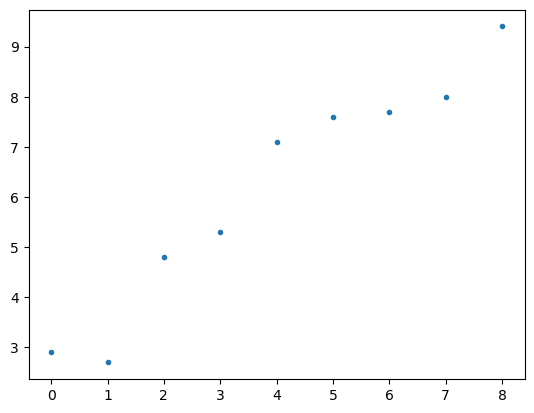

In [4]:
%matplotlib inline
plt.figure()
plt.plot(t, y, '.')

### Another example

In [5]:
y = np.array([2.9, 2.7, 4.8, 5.3, 7.1, 7.6, 7.7, 7.6, 9.4, 9.0, 9.6,10.0, 10.2, 9.7])
t = np.array(range(14))

# Note that the vectors y and t have the same number of elements:
print(len(t), len(y))
print('t:',t)
print('y:',y)

14 14
t: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
y: [ 2.9  2.7  4.8  5.3  7.1  7.6  7.7  7.6  9.4  9.   9.6 10.  10.2  9.7]


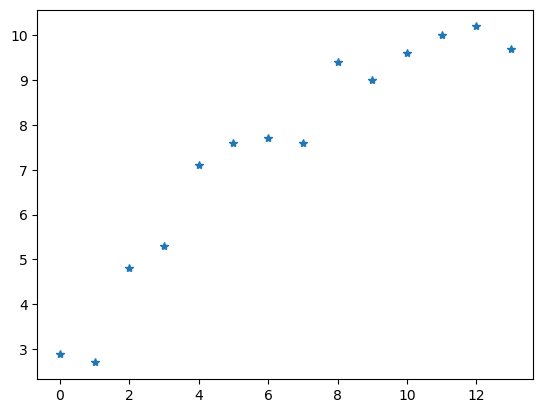

In [6]:
%matplotlib inline
plt.figure()
plt.plot(t, y, '*')

## We want to create matrix A to reflect this 1st-order set of equations
### i.e. set of $y_{n}$ = $x_{0}$ + $t_{1}$.$x_{1}$

In [7]:
m = len(y)
# Create matrix A that is all 1s, with dims m rows and 2 cols
A = np.ones((m,2))
#print(A)

A[:, 1] = t
print(A)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]]


## We have A and we have y, so let's solve for x in Ax = y
**Since this is an OVERDETERMINED system, we cannot solve using the typical npla.solve() solver**

***Instead, we have to use the npla.lstsq() method***

In [8]:
# LSTSQ [0] returns the x-vector
print("A: \n", A)
print("y: \n", y)
x = npla.lstsq(A, y, rcond = None)[0]
print(x)

# Note: x[0] and x[1] are the coefficients for the straight line
# i.e. y(t) = x[0] + x[1].t

print("x0: ",x[0],'\nx1: ',x[1])

A: 
 [[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]]
y: 
 [ 2.9  2.7  4.8  5.3  7.1  7.6  7.7  7.6  9.4  9.   9.6 10.  10.2  9.7]
[3.64857143 0.57714286]
x0:  3.6485714285714286 
x1:  0.5771428571428571


In [9]:
# Can we duplicate using QR factorization?

Q,R = npla.qr(A)
x_qr = npla.inv(R)@Q.T@y
print(x_qr)

[3.64857143 0.57714286]


**How far away is EACH data point (i.e. in y) from the line determined by LSQ method?**

***Best determined with a residual calculation:***

The **residual vector** will show the difference of EACH point from the "ideal" line and
the **relative residual value** acts as an "average" of sorts of all these point differences.

BOTH the residual vector AND the relative residual value are useful metrics.

In [10]:
# Ax = b is the least-square approximation
# y - Ax is the residue

r = y - A @ x
print('The residual vector r:\n', r, '\n')
print('The relative residual norm:\n', npla.norm(r)/npla.norm(y))

The residual vector r:
 [-0.74857143 -1.52571429 -0.00285714 -0.08        1.14285714  1.06571429
  0.58857143 -0.08857143  1.13428571  0.15714286  0.18        0.00285714
 -0.37428571 -1.45142857] 

The relative residual norm:
 0.10438964125924657


## Notes on the `numpy` function `linspace()`

### If we want to plot the "ideal" line that was determined by the LSQ method, then we need to create an x-axis of evenly spaced numbers. The function `linspace()` can do this:

In [11]:
# np.linspace(a,b,c) - Returns evenly spaced numbers over a specified interval.
# This example returns 10 points evenly space between 0 and 13.

np.linspace(0, 13, num = 10)

array([ 0.        ,  1.44444444,  2.88888889,  4.33333333,  5.77777778,
        7.22222222,  8.66666667, 10.11111111, 11.55555556, 13.        ])

In [12]:
# This example returns N points evenly space between START and END.

START = 0
END = 13
N = 10

np.linspace(START, END, num = N)

array([ 0.        ,  1.44444444,  2.88888889,  4.33333333,  5.77777778,
        7.22222222,  8.66666667, 10.11111111, 11.55555556, 13.        ])

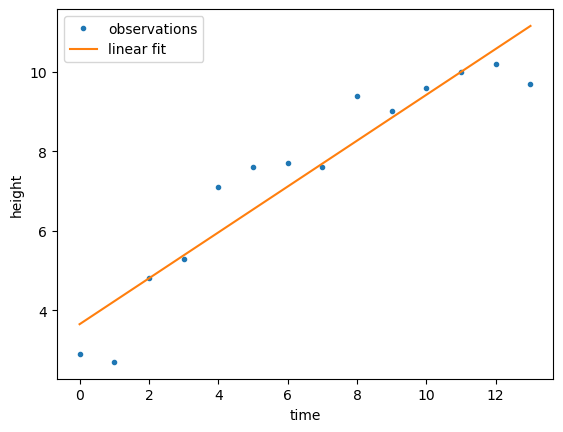

In [13]:
%matplotlib inline
plt.figure()
plt.plot(t, y, '.')

polyt = np.linspace(0, 13, num = 100)
polyy = x[0] + x[1]*polyt 

plt.plot(polyt, polyy)
plt.xlabel('time')
plt.ylabel('height')
plt.legend(('observations', 'linear fit'))

# LSQ: Parabolic (2nd order) fit

t: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
y: [ 2.9  2.7  4.8  5.3  7.1  7.6  7.7  7.6  9.4  9.   9.6 10.  10.2  9.7
  8.3  8.4  9.   8.3  6.6  6.7  4.1]


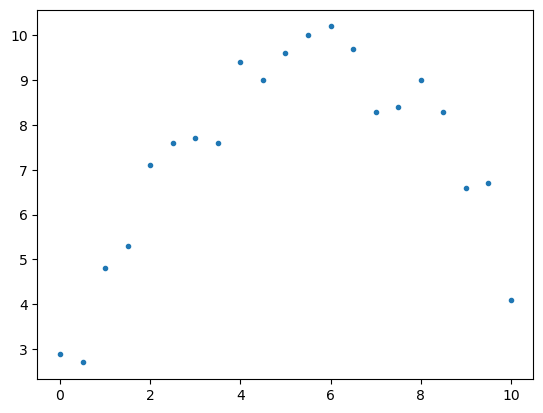

In [14]:
t = np.array(range(21))/2
y = np.array([2.9, 2.7, 4.8, 5.3, 7.1, 7.6, 7.7, 7.6, 9.4, 9.0, 9.6, 
              10.0, 10.2, 9.7, 8.3, 8.4, 9.0, 8.3, 6.6, 6.7, 4.1])
print('t:',t)
print('y:',y)

%matplotlib inline
plt.figure()
plt.plot(t,y,'.')

## We want to create matrix A to reflect this 2nd-order set of equations
### i.e. set of $y_{n}$ = $x_{0}$ + $t_{1}$.$x_{1}$ + $t_{2}^{2}$.$x_{2}$

*Step 1: Set up matrix A:*

In [15]:
m = len(y)
A = np.ones((m,3))

# What-if you wanted to fit this to a cubic curve???
#A = np.ones((m,4))

A[:,1] = t
A[:,2] = t**2

print(A)

[[  1.     0.     0.  ]
 [  1.     0.5    0.25]
 [  1.     1.     1.  ]
 [  1.     1.5    2.25]
 [  1.     2.     4.  ]
 [  1.     2.5    6.25]
 [  1.     3.     9.  ]
 [  1.     3.5   12.25]
 [  1.     4.    16.  ]
 [  1.     4.5   20.25]
 [  1.     5.    25.  ]
 [  1.     5.5   30.25]
 [  1.     6.    36.  ]
 [  1.     6.5   42.25]
 [  1.     7.    49.  ]
 [  1.     7.5   56.25]
 [  1.     8.    64.  ]
 [  1.     8.5   72.25]
 [  1.     9.    81.  ]
 [  1.     9.5   90.25]
 [  1.    10.   100.  ]]


*Step 2: find x by using the npla.lstsq() function.*

*Step 3: calculate the relative residual norm.*

In [22]:
x = npla.lstsq(A, y, rcond = None)[0]
print(x)

r = y - A @ x
print('\nThe residual vector r:\n', r, '\n')
print(npla.norm(r) ** 2)
print(npla.lstsq(A, y, rcond = None)[1])
print('The relative residual norm:\n', npla.norm(r)/npla.norm(y))

[ 2.17571993  2.67041339 -0.23844394]

The residual vector r:
 [ 0.72428007 -0.75131564  0.19231062 -0.34484115  0.53722904  0.2385212
 -0.34096466 -1.00122857  0.3577295  -0.36409046  0.03331154  0.34993551
  0.58578145  0.24084936 -0.88486077 -0.39134893  0.72138489  0.65334066
 -0.29548159  0.67491813 -0.93546019] 

6.795716009391058
[6.79571601]
The relative residual norm:
 0.07384248666934153


*Step 4: Plot the data points and overlay a plot of the model:*

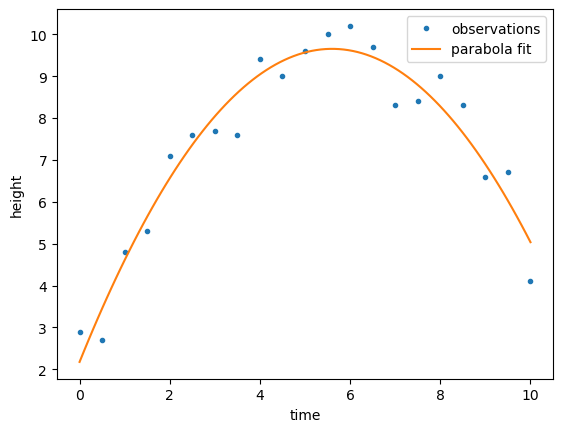

In [17]:
%matplotlib inline
plt.figure()
plt.plot(t,y,'.')

polyt = np.linspace(0,10,num=100)
polyy = x[0] + x[1]*polyt + x[2]*polyt**2

# What-if you wanted to fit this to a cubic curve???
#polyy = x[0] + x[1]*polyt + x[2]*polyt**2 + x[3]*polyt**3

plt.plot(polyt,polyy)
plt.xlabel('time')
plt.ylabel('height')
plt.legend(('observations', 'parabola fit'))